## AI Based Crop Health Monitoring Capstone Project

**AI-Based Precision Agriculture**

**Capstone Overview**

This project aims to automate crop health assessment using multispectral data features. By analyzing vegetation indices like NDVI, GNDVI, and SAVI, we will build a model to classify crops as 'Healthy' or 'Stressed', enabling targeted interventions.

**Objectives**

*   Understand spectral vegetation indices (NDVI, EVI, SAVI).
*   Train a machine learning classifier for crop health status.
*   Evaluate model performance using precision, recall, and ROC-AUC.
*   Generate spatial health maps using grid coordinates.
*   Develop drone-based or fertilizer strategies based on insights.

**Capstone Tasks**

1.  Data Understanding
2.  Machine Learning Model
3.  Spatial Analysis & Visualization
4.  Agrotech Strategy
5.  Reflection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv("main.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("main.csv not found. Please ensure the file is in the working directory.")
    df = pd.DataFrame()

display(df.head())
display(df.info())

Dataset loaded successfully!


,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y,crop_health_label
0,0.462178,0.118574,0.345162,0.527650,0.434070,0.493184,0.426272,0.538210,0.387860,0.715725,0.531091,0.586647,0.679785,9,0,Healthy
1,0.865500,0.023196,0.814436,1.056953,0.855039,0.887622,0.807505,0.200828,0.391693,0.350926,0.304631,0.418664,0.926373,4,8,Healthy
2,0.712396,0.022876,0.539486,0.881657,0.628224,0.721757,0.708308,0.139121,0.474993,0.479509,0.394532,0.829622,0.443202,6,7,Healthy
3,0.619061,0.062069,0.515087,0.696248,0.578767,0.609120,0.640899,0.494059,0.354945,0.555526,0.594686,0.882743,0.788671,4,5,Healthy
4,0.309213,0.083524,0.178098,0.466014,0.357456,0.357234,0.434805,0.517743,0.152411,0.767144,0.781283,0.916408,0.637918,14,19,Healthy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ndvi_mean          1200 non-null   float64
 1   ndvi_std           1200 non-null   float64
 2   ndvi_min           1200 non-null   float64
 3   ndvi_max           1200 non-null   float64
 4   gndvi              1200 non-null   float64
 5   savi               1200 non-null   float64
 6   evi                1200 non-null   float64
 7   red_edge_1         1200 non-null   float64
 8   red_edge_2         1200 non-null   float64
 9   nir_reflectance    1200 non-null   float64
 10  soil_brightness    1200 non-null   float64
 11  canopy_density     1200 non-null   float64
 12  moisture_index     1200 non-null   float64
 13  grid_x             1200 non-null   int64  
 14  grid_y             1200 non-null   int64  
 15  crop_health_label  1200 non-null   object 
dtypes: float64(13), int64(2)

None

### Task 1: Data Understanding - Soil & Vegetation Indices

Key spectral features used in this analysis:

*   **NDVI (Normalized Difference Vegetation Index):** Measure of live green vegetation. High values (0.6-0.9) indicate healthy crops.
*   **GNDVI (Green NDVI):** More sensitive to chlorophyll than NDVI.
*   **SAVI (Soil Adjusted Vegetation Index):** Corrects NDVI for soil brightness influence in sparse canopy areas.
*   **EVI (Enhanced Vegetation Index):** Improves sensitivity in high biomass regions.
*   **Moisture Index:** Indicator of leaf water content (drought stress).
*   **Grid (X, Y):** Spatial coordinates of the field test plots.
*   **Label:** Target variable (Healthy vs Stressed).

In [2]:
display(df.describe())

,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.549409,0.084760,0.426339,0.673198,0.549456,0.548230,0.547482,0.347123,0.353908,0.548972,0.445149,0.651057,0.548473,9.555833,9.512500
std,0.206205,0.037428,0.209405,0.210139,0.209522,0.210656,0.217635,0.143147,0.143760,0.204472,0.206082,0.204135,0.259727,5.793662,5.813749
min,0.203242,0.020203,0.021354,0.265189,0.085060,0.119313,0.068225,0.100120,0.101227,0.200110,0.100934,0.300388,0.100279,0.000000,0.000000
25%,0.366633,0.052097,0.247114,0.487883,0.366233,0.365079,0.369241,0.224678,0.232504,0.368337,0.264461,0.468347,0.327327,5.000000,4.000000
50%,0.556761,0.085807,0.435165,0.670934,0.550906,0.546413,0.553370,0.346752,0.353218,0.543587,0.438322,0.649936,0.545526,10.000000,10.000000
75%,0.729287,0.115859,0.602736,0.852604,0.719411,0.727774,0.733130,0.470124,0.479491,0.730997,0.623496,0.835916,0.775092,15.000000,15.000000
max,0.899802,0.149924,0.835727,1.087604,0.972632,0.974679,1.030173,0.599753,0.599837,0.899089,0.799191,0.999864,0.999932,19.000000,19.000000


### Task 2: Machine Learning Model

Train a classifier to predict 'Crop Health'.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode Target
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['crop_health_label'])

# Define Features (visual/spectral only, exclude grid coords for classification generalized performance)
feature_cols = ['ndvi_mean', 'ndvi_std', 'gndvi', 'savi', 'evi', 'moisture_index', 'canopy_density']
X = df[feature_cols]
y = df['label_encoded']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Mapping: {'Healthy': np.int64(0), 'Stressed': np.int64(1)}

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.94      0.94      0.94       232
    Stressed       0.90      0.88      0.89       128

    accuracy                           0.92       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.92      0.92      0.92       360

Confusion Matrix:
[[219  13]
 [ 15 113]]


### Task 3: Spatial Analysis & Visualization

Map the predicted health status back to the field grid.

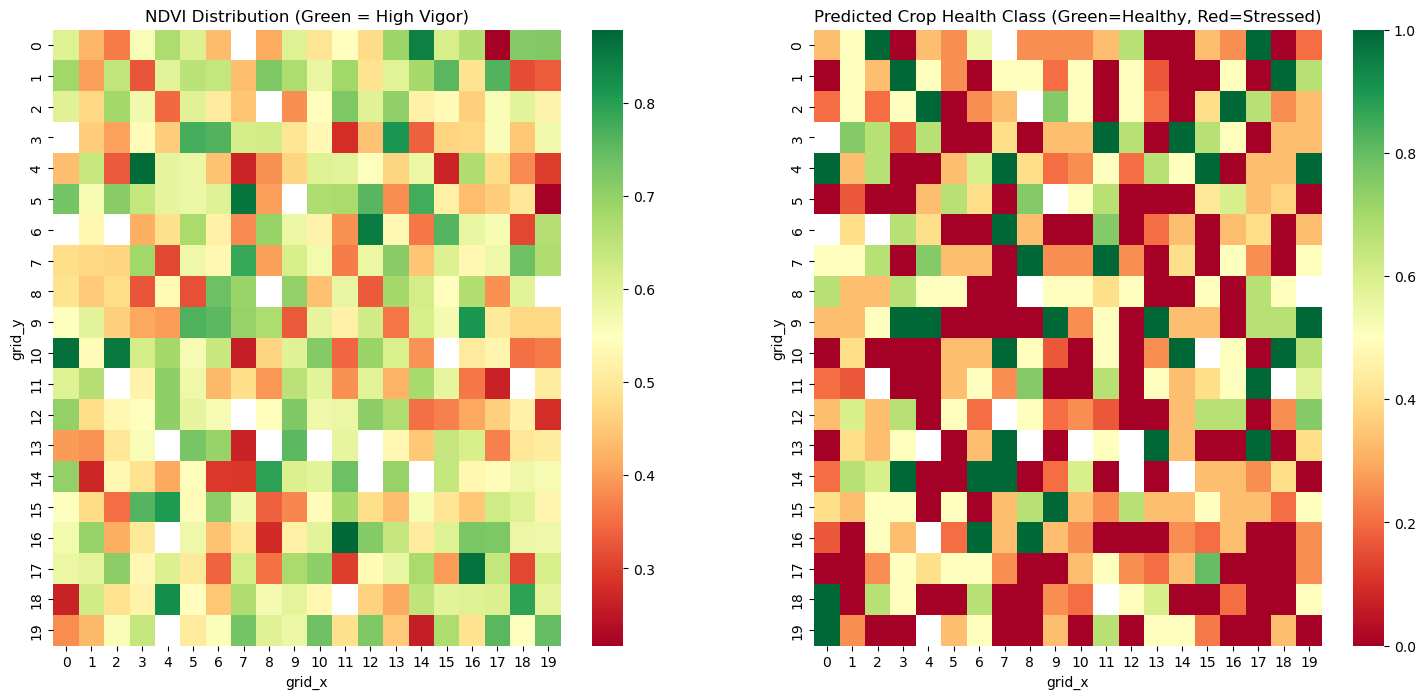

In [4]:
# Get model probabilities for the Stressed class (assuming 'Stressed' is class 1 or similar, we check inverse)
# Let's visualize the Probability of being "Healthy" or "Stressed".
# We will output NDVI heatmap vs Predicted Health Heatmap

df['pred_label'] = model.predict(df[feature_cols])

# Pivot tables for Heatmaps
ndvi_map = df.pivot_table(index='grid_y', columns='grid_x', values='ndvi_mean')
health_map = df.pivot_table(index='grid_y', columns='grid_x', values='pred_label')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(ndvi_map, cmap='RdYlGn', annot=False, ax=axes[0])
axes[0].set_title('NDVI Distribution (Green = High Vigor)')

sns.heatmap(health_map, cmap='RdYlGn', annot=False, ax=axes[1])
axes[1].set_title('Predicted Crop Health Class (Green=Healthy, Red=Stressed)')

plt.show()

### Task 4: Agrotech Strategy

**Precision Interventions:**
1.  **Variable Rate Technology (VRT):** Apply nitrogen fertilizer only to zones with low GNDVI but adequate moisture (preventing leaching).
2.  **Irrigation Scheduling:** Focus water resources on the 'Red' zones in the Health Heatmap identified as moisture-deficient.
3.  **Scouting:** Dispatch agronomy teams to 'Stressed' clusters to investigate for pests/diseases manually.

**Yield Forecasting:**
*   Use EVI integration over the season to predict biomass accumulation and harvest yield.

### Task 5: Reflection

**Limitations:**
*   **Soil Background:** SAVI helps, but bare soil can still skew NDVI in very early growth stages.
*   **Atmospheric Interference:** Clouds can disrupt satellite readings; drone data is preferred for critical timing.

**Future Work:**
*   Integrate hyperspectral data for specific nutrient deficiencies (P, K).
*   Temporal series analysis (Time-Series) to track growth curves.